## Assignment 6 - Ruggiero Julian

#### The dataset to be analized is related to prices and other attributes of nearly 54,000 diamonds. A description of the attributes can be found here:

https://ggplot2.tidyverse.org/reference/diamonds.html

##### Reading data from GitHub to pandas dataframe
To be able to read the data, it is first uploaded to my GitHub account and then access the raw data url into the read_csv pandas function.

In [6]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/gitjuli/DAV-5400/master/Data/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.shape

(53940, 10)

As we can see with the shape function that matches dataset documentation, it contains 53940 rows and 10 variables/columns

### Questions
#### 1. What proportion of diamonds are between .30 and 1.08 carats?

Before answering the question I will do some EDA to understand better the carat data. For a quick reference carat means weight of the diamond (0.2--5.01).

In [8]:
df['carat'].describe()

count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

We can see that, matching the documentation, the min value is 0.2 and max is 5.01. The mean is 0.79.

In [9]:
pd.value_counts(pd.isnull(df['carat']))

False    53940
Name: carat, dtype: int64

In [10]:
df['carat'].dtype

dtype('float64')

It is float and there are no null values, so I will test whether each record is inside the 2 logical conditions, including the boundaries. Then will assign that boolean result to the "value_counts" pandas function to get the total records that meet both requirements.

In [13]:
countQ1=pd.value_counts(((df['carat'] <= 1.08) & (df['carat'] >= 0.30)))[1]
countQ1

40284

If we include both boundaries, there are 40284 diamonds that have between .30 and 1.08 carats.
Now to get the proportion I will divide this first result to the total amount of records, provided by df.shape[0].

In [14]:
proportionQ1=countQ1/df.shape[0]
print(proportionQ1)

0.7468298109010011


This means that almost 75% of the diamonds inside the dataset (40284/53940) have carat between .30 and 1.08

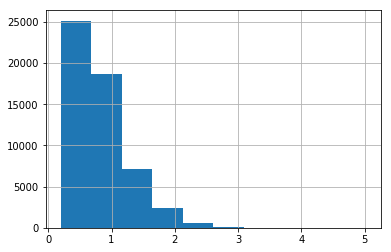

In [17]:
df["carat"].hist();

The finding is consistent with the histogram, as this shows that most of the results are between 0.30 and 1.08 

#### 2) How many of the diamonds have equal x and y dimensions?

I will first understand the characteristics of both attributes to see if matches with the documentation. Then check if there is any null vallue in any either x or y. After that I will apply the logical condition to see how many of the diamonds have equal x and y dimensions.

In [76]:
df['x'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

In [77]:
df['y'].describe()

count    53940.000000
mean         5.734526
std          1.142135
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

It is interesting to see that the lenght (x) and the width (y) have almost the same mean, which is around 5.73 but the width can reach values up to 58.9 whereas max of lenght is 10.74

In [78]:
pd.value_counts(pd.isnull(df['x']))

False    53940
Name: x, dtype: int64

In [79]:
pd.value_counts(pd.isnull(df['y']))

False    53940
Name: y, dtype: int64

In [21]:
countQ2=pd.value_counts((df['x'] == df['y']))[1]
print(countQ2)

17


In [112]:
#displaying diamonds that meet conditions
df[df['x'] == df['y']] 

,carat,cut,color,clarity,depth,table,price,x,y,z,price_x_carat
3397,0.30,Ideal,H,VVS2,62.5,54.0,567,4.30,4.30,2.70,1890.000000
10055,0.27,Very Good,F,VVS1,62.0,55.0,591,4.16,4.16,2.59,2188.888889
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00,5139.000000
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00,5597.368421
16516,1.00,Premium,E,VS2,60.0,60.0,6600,6.43,6.43,3.89,6600.000000
16851,1.00,Premium,E,VS2,60.0,60.0,6720,6.43,6.43,3.89,6720.000000
17368,1.22,Premium,G,SI2,62.4,61.0,6969,6.79,6.79,4.23,5712.295082
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00,8205.128205
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00,13071.666667
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00,8015.111111


There are no null values and the amount of diamonds that have equal x and y dimensions is 17, we can also see with the results that there are several diamonds with values of zero in x,y and also z. From what I read about diamonds on the web, and despite the dataset says for x: length in mm (0--10.74), I think that we should not leave this records, as it is not consistent to have a diamond with 0.00 length and 0.00 width. Maybe there could be 0.001mm and it is rounded to 0.00mm in the data.

#### 3) How many of the diamonds have a carat less than the mean carat value?

For this question I will get the mean carat value and then apply a logical condition to find the number of records that have a carat less than the mean and also provide a proportion of the total amount of diamonds.

In [122]:
meanCarat=df['carat'].mean()
print(f"The mean carat value is {meanCarat}")

The mean carat value is 0.7979397478679852


In [123]:
countQ3=pd.value_counts(df['carat']<meanCarat)[1]
print(f"There are {countQ3} diamonds that have a carat less than the mean, which represents a proportion of {countQ3/df.shape[0]}")

There are 31127 diamonds that have a carat less than the mean, which represents a proportion of 0.5770671116054876


To better understand this result, below there is an histogram below (made with matplotlib) showing how spread the carat values is in the dataset, and a dashed line representing the mean, to see on its left, the ones that are smaller than the mean value.

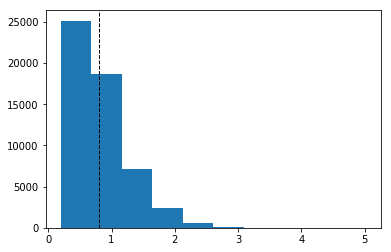

In [124]:
import matplotlib.pyplot as plt
result = plt.hist(df['carat'])
plt.axvline(meanCarat, color='k', linestyle='dashed', linewidth=1);

#### 4) How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

First I will check that there are no other values than the ones expected for the "cut" attribute.

In [125]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

To calculate the number I include 2 boolean conditions to check for Premium or Ideal (since only Ideal is better than Premium) and if any of them is True then the record will be included in the result and then print the number of diamonds that matches any of those two conditions.

In [126]:
countQ4=pd.value_counts((df.cut == 'Premium') | (df.cut == 'Ideal'))[1]
print(f"There are {countQ4} diamonds that have a Premium cut or better, which represents a proportion of {countQ4/df.shape[0]}")

There are 35342 diamonds that have a Premium cut or better, which represents a proportion of 0.6552094920281795


#### 5)Which diamond has the highest price per carat? What is its value?

In [127]:
#displaying first rows to remember how the dataset looks like
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_x_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


First I create a new column in the dataframe df called 'price_x_carat' which will store the price divided by the carat. Then display the first 5 rows with head() to see that it was sucessfully created.

In [128]:
df['price_x_carat']=df['price']/df['carat']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_x_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


Now to show the diamond with the highest price per per carat I sort by the new column in desc order, and then get the first record with head(1). Result is stored in new dataframe called hp

In [129]:
hp=df.sort_values('price_x_carat',ascending=False).head(1)
print(f"The diamond with the highest price per carat is the one below")
hp

The diamond with the highest price per carat is the one below


,carat,cut,color,clarity,depth,table,price,x,y,z,price_x_carat
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154


In [130]:
print(f"As we can see the its price is {hp.iloc[0]['price_x_carat']}")

As we can see the its price is 17828.846153846152


#### 6) Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?

First I define a bar graph for the 'cut' attribute using the value_counts() for each different value in the attribute.

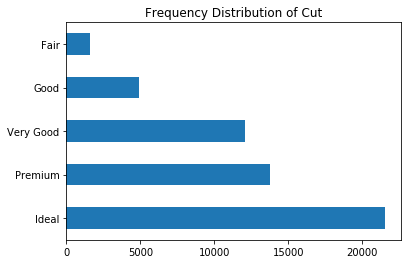

In [157]:
barGraph=df['cut'].value_counts().plot(kind='barh', title='Frequency Distribution of Cut');

The frecuency distribution of the cut attribute tells me that, as stated in question 4, the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal and follows the distribution. So 'Fair' is the category with the least amount of diamonds and 'Ideal' the one with the most amount of records with more than 20000.
This means that overall the diamonds in the dataset have a very high quality cut.

#### 7) Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance of the boxplots.

For this question I will build a boxplot for each cut and display all 5 together to make the comparison easier and will provide some conclusions. Then I will provide statistics for each one that are useful to have the exact number in the distribution (first quartile or 25%, second quarter or median, etc).

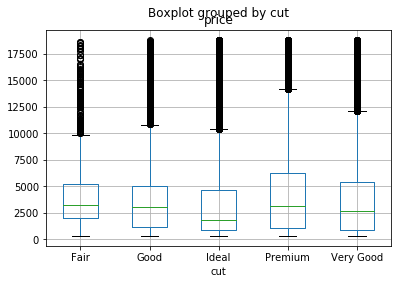

In [132]:
df.boxplot(column='price',by='cut');

Creating boxplot considering the price for each category:
- There are big amount of outliers with prices above the upper inner fence for all categories, with a max value around 18600 in all of them.
- Premium cut contains more variable interquartile data as is the wider box.
- The Ideal cut contains the smaller median (green line), which means that the upper 50% of the values are wider or more spread than any other category.

The most important conclusion is that the type of Cut does not neccesarly determine the price of a diamond, meaning that a Fair cut could be as expensive as a Premium or Ideal cut. There are definitively other characteristics, such as length, width, color, clarity, depth, table, price that influence the price.
We can also take a closer look at most of the box values using the describe function for each category as below

In [133]:
df[(df['cut']== 'Fair')]["price"].describe()

count     1610.000000
mean      4358.757764
std       3560.386612
min        337.000000
25%       2050.250000
50%       3282.000000
75%       5205.500000
max      18574.000000
Name: price, dtype: float64

In [134]:
df[(df['cut']== 'Good')]["price"].describe()

count     4906.000000
mean      3928.864452
std       3681.589584
min        327.000000
25%       1145.000000
50%       3050.500000
75%       5028.000000
max      18788.000000
Name: price, dtype: float64

In [135]:
df[(df['cut']== 'Very Good')]["price"].describe()

count    12082.000000
mean      3981.759891
std       3935.862161
min        336.000000
25%        912.000000
50%       2648.000000
75%       5372.750000
max      18818.000000
Name: price, dtype: float64

In [136]:
df[(df['cut']== 'Premium')]["price"].describe()

count    13791.000000
mean      4584.257704
std       4349.204961
min        326.000000
25%       1046.000000
50%       3185.000000
75%       6296.000000
max      18823.000000
Name: price, dtype: float64

In [137]:
df[(df['cut']== 'Ideal')]["price"].describe()

count    21551.000000
mean      3457.541970
std       3808.401172
min        326.000000
25%        878.000000
50%       1810.000000
75%       4678.500000
max      18806.000000
Name: price, dtype: float64

We can also see the boxplots considering the new column 'price_x_carat', instead of 'price', to have a better analysis because the price is being conditioned by the weigth of the diamond.

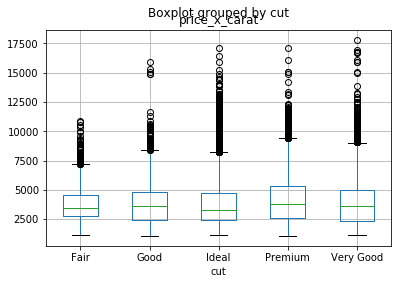

In [138]:
price_bx=df.boxplot(column='price_x_carat',by='cut');

In this case the amount of outliers is a bit reduced and the prices_x_carat are more related to the cut of the diamond, since for Fair and Good cuts there are a smaller number of outlier than the other categories.

#### 8) Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.

For each histogram below I will include a dashed line containing the mean for each variable using matplotlib.

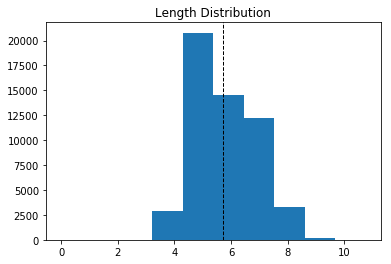

In [153]:
#length
mean_length=df['x'].mean()
h_length = plt.hist(df['x'])
plt.title('Length Distribution')
plt.axvline(mean_length, color='k', linestyle='dashed', linewidth=1);

In [140]:
df['x'].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

This histogram shows an idea on the distribution of the length variable across all diamonds and it looks like the mean is 5.7 mm and the highest frequency is around 4.7mm and 5.7mm with over 20000 diamonds, which is nearly 40% of the total.

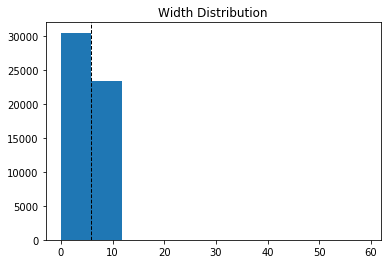

In [141]:
#width
mean_width=df['y'].mean()
h_length = plt.hist(df['y'])
plt.title('Width Distribution')
plt.axvline(mean_width, color='k', linestyle='dashed', linewidth=1);

In [142]:
mean_width

5.734525954764462

In [143]:
pd.value_counts(df['y']==0)[1]

7

This histogram and the calculations above show that there are 7 diamonds width of 0 mm. The mean is 5.7mm and the frequency, according to this graph goes from 0mm to a little higher than 10mm. However, the histogram does not show 2 big outliers (one of 32mm and other of 58mm), than can be seen with the boxplot below 

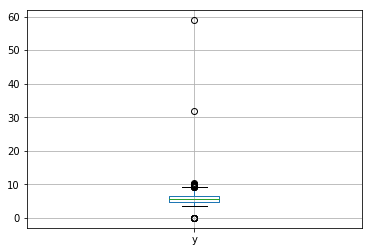

In [144]:
price_bx=df.boxplot(column='y');

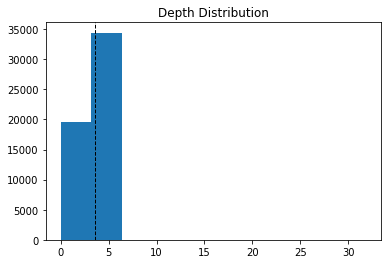

In [145]:
#depth
mean_depth=df['z'].mean()
h_length = plt.hist(df['z'])
plt.title('Depth Distribution')
plt.axvline(mean_depth, color='k', linestyle='dashed', linewidth=1);

In [146]:
mean_depth

3.5387337782723316

In [147]:
pd.value_counts(df['z']==0)[1]

20

This histogram shows an idea on the distribution of the depth variable across all diamonds and it looks like the mean is 3.53 mm and the highest frequency is around 5mm. There are also 20 diamonds with depth of 0 in the data.

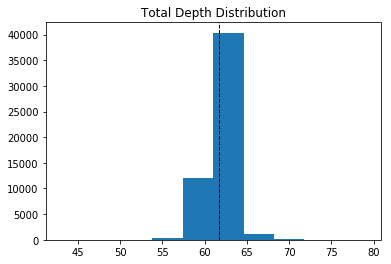

In [107]:
#total depth
mean_total_depth=df['depth'].mean()
h_length = plt.hist(df['depth'])
plt.title('Total Depth Distribution')
plt.axvline(mean_total_depth, color='k', linestyle='dashed', linewidth=1);

In [148]:
mean_total_depth

61.74940489432624

According to the attributes description total depth is:

total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

The histogram shows how spread is the z values in the set of data. The highest frequency is between 60mm and  and the mean is 61.75mm

#### 9) Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

To create the plot I use the scatter function, with the 'price' in x axis and 'carat' in y axis.

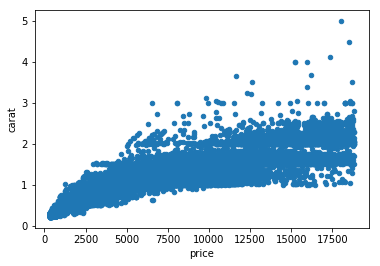

In [149]:
df.plot.scatter(x='price',y='carat');

The scatter plot shows a linear relationship between the 2 variables up to a price of around 2500 and a carat of 1. Then the price starts growing much faster for each unit of carat. There are still some exceptions having diamonds with a price of 7500 and carat of 3, but in contrast there are also diamonds with 3 carat but price greater than 17500. There are also outliers having this same price and a carat up to 5. 

We can also make the same analysis, inverting the axis, having the price as the dependent variable and carat as the independent variable as shown below.

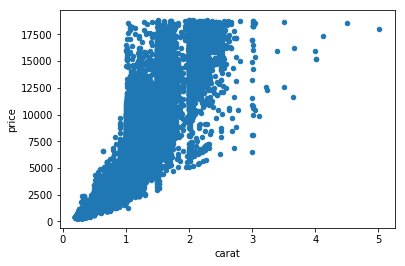

In [152]:
df.plot.scatter(x='carat',y='price');

There is a wide variety of prices for diamonds with carat between 1 and 3, having prices from 5000 up to 17500 for only 1 carat. There are outliers showing the same high price around 17500 for diamonds with carat of 1 or carat 5. 
In conclusion the price does not necessarily only depends on the diamond weight.